# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Eric\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


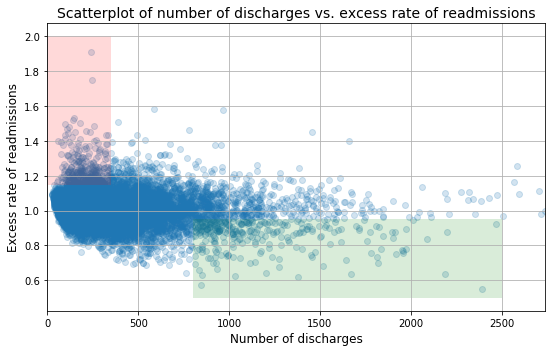

In [118]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [15]:
hospital_read_df['Hospital Name'].unique()

array(['FROEDTERT MEMORIAL LUTHERAN HOSPITAL', 'PROVIDENCE HOSPITAL',
       'BEAUFORT COUNTY MEMORIAL HOSPITAL', ..., 'COLUMBIA CENTER',
       'BAYLOR EMERGENCY MEDICAL CENTER', 'CAPITAL HOSPICE'], dtype=object)

In [12]:
hospital_read_df[hospital_read_df['Hospital Name']=='PROVIDENCE HOSPITAL'].sort_values('Number of Discharges', ascending=False)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
2549,PROVIDENCE HOSPITAL,90006,DC,READM-30-HF-HRRP,659,NaN,1.0711,24.1,22.5,163.0,07/01/2010,06/30/2013
1595,PROVIDENCE HOSPITAL,90006,DC,READM-30-AMI-HRRP,61,NaN,1.0995,22.3,20.3,19.0,07/01/2010,06/30/2013
11135,PROVIDENCE HOSPITAL,10090,AL,READM-30-HF-HRRP,605,NaN,0.9337,20.3,21.8,119.0,07/01/2010,06/30/2013
2935,PROVIDENCE HOSPITAL,10090,AL,READM-30-PN-HRRP,559,NaN,1.0625,17.2,16.2,100.0,07/01/2010,06/30/2013
422,PROVIDENCE HOSPITAL,10090,AL,READM-30-HIP-KNEE-HRRP,550,NaN,1.1835,6.2,5.2,37.0,07/01/2010,06/30/2013
9250,PROVIDENCE HOSPITAL,10090,AL,READM-30-COPD-HRRP,424,NaN,0.9653,19.0,19.7,78.0,07/01/2010,06/30/2013
1748,PROVIDENCE HOSPITAL,90006,DC,READM-30-COPD-HRRP,299,NaN,1.0944,22.5,20.5,74.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
10849,PROVIDENCE HOSPITAL,90006,DC,READM-30-PN-HRRP,241,NaN,0.9394,16.1,17.1,35.0,07/01/2010,06/30/2013
9276,PROVIDENCE HOSPITAL,10090,AL,READM-30-AMI-HRRP,225,NaN,0.9649,15.0,15.6,32.0,07/01/2010,06/30/2013


The analysis above draws a conclusion on significant correlation between hospital capacity (number of discharges) and excess readmission rate without providing any actual statistical testing. The recommendations also only address hospitals with smaller capacities (<300) which may not reduce the readmission rate that efficiently.

The largest issue with the analysis is that it only checks the correlation between hospital capacity and the excess readmission rate. It fails to take the surgical procedure (measure name) and hospital names into consideration. Taking a closer look at the data, we can see that there is variance in the number of discharges for each hospital (e.g. Providence Hospital has listed discharges ranging from 61 to 659). Looking even further, we see that hospitals have multiple provider numbers that each have their own set of data so it might be a good idea to study the provider number instead of the hospital name.

However, for this problem, we will simply study the correlation between hospital capacity and excess readmission rate and use statistical tests to show statistical significance. We will be using the cleaned dataframe with all the rows with missing values for number of discharges removed, but we will also be removing rows with missing values for the excess readmission ratio.

In [11]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [9]:
cleaned_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].isnull() == False]
cleaned_df.info()

# Cleaned data removed all 81 null values from all columns besides the Footnote column. However, it also removed all rows
# with a non-null value for the footnotes.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


We will first determine quantify the correlation between the two variables.

In [11]:
discharges = cleaned_df['Number of Discharges']
readmission = cleaned_df['Excess Readmission Ratio']

In [13]:
corr = np.corrcoef(discharges, readmission)[0,1]
print (corr)

-0.09739794351079353


### 1. Setup an appropriate hypothesis test.

It appears that there is a very slight negative correlation between the number of discharges and excess readmission ratios. We will now test if this correlation is statistically significant.


Null Hypothesis (Ho) = two variables are not correlated


Alternate Hypothesis (Ha) = two variables are correlated

Alpha = 0.01

### 2. Compute and report the observed significance value (or p-value).

In [20]:
perm_trials = np.empty(10000)

for i in range(10000):
    discharges_permutated = np.random.permutation(discharges)
    perm_trials[i] = np.corrcoef(discharges_permutated, readmission)[0,1]

p = np.sum(perm_trials <= corr) / len(perm_trials)
print ('Frequency of trials with Pearson coefficient as extreme:', p)

Frequency of trials with Pearson coefficient as extreme: 0.0


### 3. Report statistical significance for  α  = .01.

Using the frequentist approach, we were able to determine that the negative correlation between the number of discharges and rate of readmission is in fact statistically significant (p-value = 0.0 < 0.01). 

We'll be splitting the dataset at "Number of Discharges" <= 300 and > 300 to determine if there is any statistically significant difference between them.

In [25]:
small_data = cleaned_df[cleaned_df['Number of Discharges'] <= 300]
large_data = cleaned_df[cleaned_df['Number of Discharges'] > 300]

In [59]:
small_data.describe()

# This dataset has a total of 6132 datapoints

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,6132.000000,6132.000000,0.0,6132.000000,6132.000000,6132.000000,6132.000000
mean,258798.579419,170.018428,NaN,1.014261,18.561301,18.397489,31.311970
std,158435.946063,70.194140,NaN,0.082426,4.397300,4.247072,15.676909
min,10005.000000,25.000000,NaN,0.760200,4.200000,4.300000,11.000000
25%,110105.000000,111.000000,NaN,0.961175,16.700000,16.800000,18.000000
50%,250068.000000,167.000000,NaN,1.006950,19.100000,19.000000,29.000000
75%,390070.250000,228.000000,NaN,1.056600,21.300000,21.100000,42.000000
max,670082.000000,300.000000,NaN,1.909500,32.800000,28.000000,113.000000


In [63]:
print('Readmissions in smaller facilities:', np.sum(small_data['Number of Readmissions']))
print('Readmissions in larger facilities:', np.sum(large_data['Number of Readmissions']))

Readmissions in smaller facilities: 192005.0
Readmissions in larger facilities: 539592.0


In [60]:
large_data.describe()

# This dataset has a total of 5365 datapoints

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,5365.000000,5365.000000,0.0,5365.000000,5365.000000,5365.000000,5365.000000
mean,256169.078844,588.855918,NaN,0.999781,17.324790,17.257875,100.576328
std,149378.317672,324.182905,NaN,0.101234,6.451629,6.128106,68.974430
min,10001.000000,301.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110191.000000,380.000000,NaN,0.938400,15.600000,16.300000,59.000000
50%,250004.000000,493.000000,NaN,0.998500,19.000000,19.000000,85.000000
75%,380089.000000,680.000000,NaN,1.060800,21.700000,21.700000,127.000000
max,670073.000000,6793.000000,NaN,1.583600,31.700000,26.500000,879.000000


We will start with a quick graphical look at both datasets.

In [29]:
s_discharges = small_data['Number of Discharges']
s_readmissions = small_data['Excess Readmission Ratio']

l_discharges = large_data['Number of Discharges']
l_readmissions = large_data['Excess Readmission Ratio']

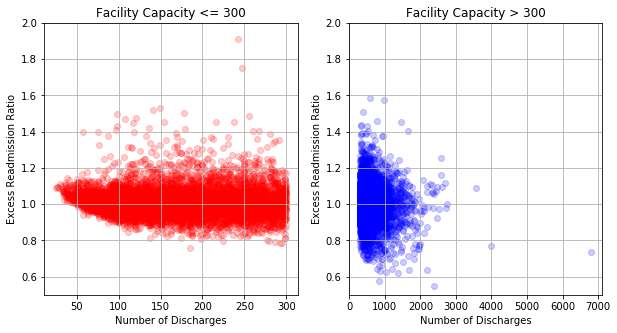

In [114]:
fig, ax = plt.subplots(ncols=2, figsize = (10,5))

ax[0].scatter(x=s_discharges, y=s_readmissions, alpha = 0.2, color='red')
ax[0].set_title('Facility Capacity <= 300')
ax[0].set_xlabel('Number of Discharges')
ax[0].set_ylabel('Excess Readmission Ratio')
ax[0].set_ylim([0.5, 2.0])


ax[1].scatter(x=l_discharges, y=l_readmissions, alpha = 0.2, color='blue')
ax[1].set_title('Facility Capacity > 300')
ax[1].set_xlabel('Number of Discharges')
ax[1].set_ylabel('Excess Readmission Ratio')
ax[1].set_ylim([0.5, 2.0])

ax[0].grid()
ax[1].grid()
plt.show()

A closer look at the data, we see there are potential outliers on both datasets. Let's take a closer look at them.

In [101]:
large_data[large_data['Number of Discharges'] == max(l_discharges)]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [102]:
small_data.sort_values('Excess Readmission Ratio', ascending=False)[:2]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013


Nothing about these 3 datapoint seem particularly suspicious, and we can't prove that the datapoints aren't real so we won't be removing them from out analysis.

In [111]:
small_corr = np.corrcoef(s_discharges, s_readmissions)[0,1]
large_corr = np.corrcoef(l_discharges, l_readmissions)[0,1]

print ('Correlation Coefficient for Small Facilities (<= 300):', small_corr)
print ('Correlation Coefficient for Large Facilities (> 300):', large_corr)

Correlation Coefficient for Small Facilities (<= 300): -0.03569207382075737
Correlation Coefficient for Large Facilities (> 300): -0.07483162817021674


Both datasets appear to retain their negative correlation.

First we will check if there is any statisically signicant difference in excess readmission ratio

Null Hypothesis (Ho): mean_diff = 0

Alternate Hypothesis (Ha): mean_diff != 0

In [105]:
empirical_readmission_mean_diff = np.mean(s_readmissions) - np.mean(l_readmissions)

readmission_repl = np.empty(10000)

all_readmissions = np.concatenate((s_readmissions, l_readmissions))

for i in range(10000):
    permutated_readmissions = np.random.permutation(all_readmissions)
    s_data = permutated_readmissions[:len(s_readmissions)]
    l_data = permutated_readmissions[len(s_readmissions):]
    readmission_repl[i] = np.mean(s_data) - np.mean(l_data)
    
p_value = np.sum(readmission_repl >= empirical_readmission_mean_diff) / len(readmission_repl)
print ('Original Sample Mean Difference:', empirical_readmission_mean_diff)
print ('Permutated Sample Confidence Interval:', np.percentile(readmission_repl, [2.5, 97.5]))
print ('Permutated Sample Mean Difference:', np.mean(readmission_repl))
print ('p-value', p_value)

Original Sample Mean Difference: 0.014479507404359437
Permutated Sample Confidence Interval: [-0.00339646  0.00342035]
Permutated Sample Mean Difference: -3.868363555369125e-06
p-value 0.0


In 10,000 trials of the null hypothesis, the difference in mean that extreme occured 0/10000 times.

The p-value of 0.0 (<0.01) supports that the difference between the two groups are statiscally significant. On average, smaller facilities (<= 300 discharges) have a higher excess readmission ratio compared to larger facilities.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In theory, statistical significance determines if the acquired statistic is due to sampling error, while pratical significance determines if the statistic is of any practical value.

There is statisical significance supporting presence of the negative correlation between number of discharges and the excess readmission ratio, but a review of practical significance would show that the correlation (-0.097) is not large enough to be of any value. In attempt to reduce readmission rates, focusing changes on smaller facilities would not be cost effective. Although on average, smaller facilities have a higher excess readmission ratio (1.44% higher) compared to larger facilities, if we calculate the actual number of readmissions, larger facilities generally have a larger number of actual readmissions. This suggests that it is necessary to improve care in facilities of all sizes.

### 5. Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

The provided scatterplot does a complete analysis of the entire data which allows for the audience to visualize the general trend of the data, and understand how the data is condensed. However, by shading parts of the grid (namely the green shading), it adds bias to the graph which magnifies the negative correlation out of proportion. I believe a better way to portray the data is excluding the shading, and adding a best of fit line to visually portray the correlation.

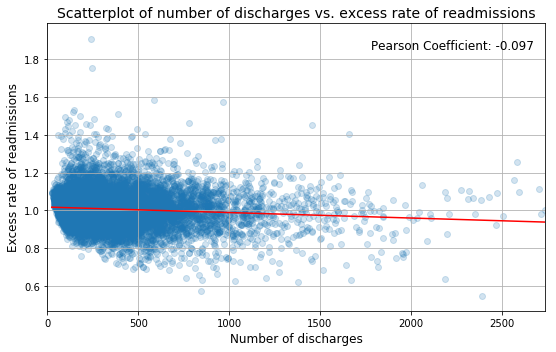

In [143]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.plot(np.unique(cleaned_df['Number of Discharges']),
                   np.poly1d(np.polyfit(cleaned_df['Number of Discharges'], cleaned_df['Excess Readmission Ratio'], 1))
                   (np.unique(cleaned_df['Number of Discharges'])), color='red')

fig.text(0.65, 0.85, r'Pearson Coefficient: -0.097', fontsize = 12)

ax.grid(True)
fig.tight_layout()